# Aufgabe 1

Trenngerade: 2+1x_1 +1x_2 = 0
Also y = -x-2

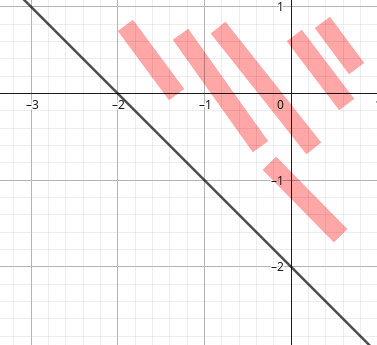

Die Perzeptrons (1,0.5,0.5) und (200,100,100) haben die gleiche Trennebene, weil die Punkte im gleichen Faktor von einander entfernt sind. 

UND 

(-1.5, 1, 1)

ODER 

(-0.5, 1, 1)

NOT

(0.5, -1)

### Warum kann ein Perzeptron kein XOR darstellen? 
Dafür bräuchte man zwei geraden. Die Entscheidungen sind so genau gegenüber, dass man keine lineare Entscheidungsgerade dafür erstellen kann. 
%TODO Tabelle einfügen

# Aufgabe 3

In [13]:
import random
#Datensatz 

def random_point():
    return random.uniform(-1,1), random.uniform(-1,1)

m1=10
d = [random_point() for i in range(m1)]
d

[(-0.299037566134962, 0.966037544638157),
 (0.643963477279095, 0.8908694108674107),
 (-0.6482971712549108, 0.24036910270452805),
 (-0.11647147864940521, -0.5042543637538024),
 (0.4373742528229938, -0.10149036892255592),
 (-0.3270955922760015, 0.41921583732412904),
 (0.3591693821870854, 0.022441237332917918),
 (-0.4256644401009846, 0.3144187064203918),
 (0.5293971429125952, 0.005289294439188463),
 (-0.7988973207383865, 0.22241610403913414)]

In [14]:
p1 = random_point()
p2 = random_point()
# p[0] = x, p[1] = y
#y=mx+n
m =  (p2[1] - p1[1]) / (p2[0] - p1[0])
n= p2[1] - m*p2[0]


def label(x, y , m, n):
    if y > m*x + n:
        return 1
    return -1

labels = [label(p[0], p[1], m, n) for p in d]

In [ ]:
w = [0,0,0]
d_wrong = [ True for _ in range(m1)]
wrong_num = [0]
alpha = 1


def check(w,p):
    if w[0]*p[0] + w[1]*p[1] + w[2] > 0:
        return 1 
    return -1

for i in range(1000):
    # Überprüfen ob es falsch klassifizierte Punkte gibt
    if True not in d_wrong: 
        print(f"Fertig! {w}, {m, n}, {d_wrong}")
        break

    #training
    false_point_index = random.choice(wrong_num)
    false_point = d[false_point_index]

    new_w0 = w[0] + alpha * labels[false_point_index] * false_point[0]
    new_w1 = w[1] + alpha * labels[false_point_index] * false_point[1]
    new_w2 = w[2] + alpha * labels[false_point_index]

    w = [new_w0, new_w1, new_w2]
    print(w)
    
    wrong_num = []

    # Falsch klassifizierte Punkte herausfinden
    for index, p in enumerate(d):
        if label(p[0], p[1], m, n) != check(w,p):
            d_wrong[index] = True
            wrong_num.append(index)
        else:
            d_wrong[index] = False        


[-0.299037566134962, 0.966037544638157, 1]
[False, False, True, True, True, False, True, True, True, True]
[0.49985975460342447, 0.7436214405990229, 0]
[False, False, False, False, True, False, True, True, True, False]
[-0.029537388309170742, 0.7383321461598344, -1]
[True, True, False, False, False, True, False, False, False, False]
[-0.35663298058517223, 1.1575479834839635, 0]
[False, False, True, False, False, False, False, True, False, True]
[0.2916641906697386, 0.9171788807794354, -1]
[True, False, False, False, False, True, False, False, False, False]
[-0.0354314016062629, 1.3363947181035645, 0]
[False, False, True, False, False, False, True, True, False, True]
[0.3902330384947217, 1.0219760116831726, -1]
[True, False, False, False, False, True, False, False, False, False]
[0.09119547235975967, 1.9880135563213297, 0]
[False, False, True, False, False, False, True, True, True, True]
[0.5168599124607443, 1.6735948499009379, -1]
[False, False, False, False, False, True, False, False,

# Experimente 

Mit einem kleineren a kann es sein, dass man nicht über das Ziel hinaus schießt. Mit einem größerem a hat man viel mehr Varianz. 
Mit einem größeren Datensatz dauert es natürlich länger das Perzeptron zu finden. Da hier aber die Linie die Punkte viel feiner trennen muss und die Gefahr viel größer ist über die richtige Gerade drüber hinaus zu schießen, hat man bei einem großen m mit einem kleinen a die Lösung im Durchschnitt viel schneller gefunden.  